In [5]:
from shared import ROOT_DIR, TRAIN, VALIDATION
import numpy as np
import random
import matplotlib.pyplot as plt
IMAGES_FOLDER = "images"
LABELS_FOLDER = "labels"

img_folder_train = ROOT_DIR/"original_data"/TRAIN/IMAGES_FOLDER
img_folder_validation = ROOT_DIR/"original_data"/VALIDATION/IMAGES_FOLDER

In [18]:
input_files = list(img_folder_validation.glob("*.npy")) + list(img_folder_train.glob("*.npy"))
input_files_clean = [fi for fi in input_files if fi.name not in ("well_15_patch_201.npy", "well_15_patch_202.npy")]
input_files_mix = input_files_clean.copy()
random.seed(49)
random.shuffle(input_files_mix)

In [19]:
n=int(0.8*len(input_files_mix))
split_train, split_val = input_files_mix[:n], input_files_mix[n:]
assert len(split_train)+len(split_val) == len(input_files_mix)
print(len(split_train), len(split_val))

7737 1935


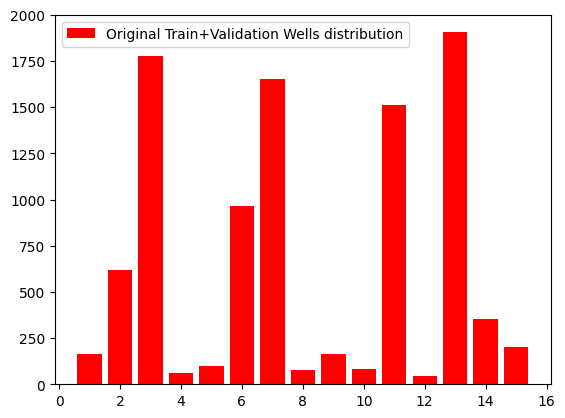

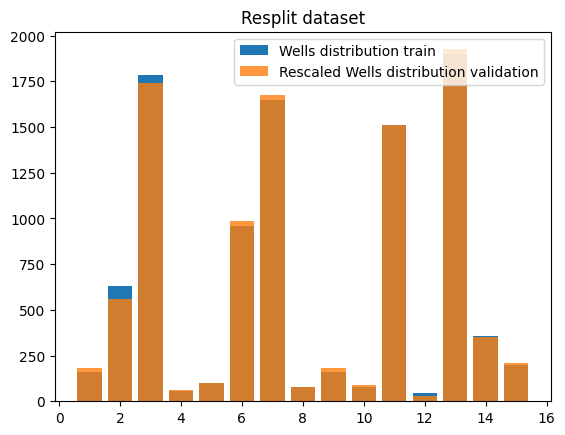

In [20]:

wells = [int(fi.name.split("_")[1]) for fi in input_files_mix]
wells_name, wells_dist = np.unique(wells, return_counts=True)
plt.bar(wells_name, wells_dist, color="r", label="Original Train+Validation Wells distribution")
plt.legend()
plt.show()

wells = [int(fi.name.split("_")[1]) for fi in split_train]
wells_name, wells_dist = np.unique(wells, return_counts=True)
plt.bar(wells_name, np.array(wells_dist)/0.8, label="Wells distribution train")
wells = [int(fi.name.split("_")[1]) for fi in split_val]
wells_name, wells_dist = np.unique(wells, return_counts=True)
plt.bar(wells_name, np.array(wells_dist)/0.2, alpha=0.8, label="Rescaled Wells distribution validation")
plt.title("Resplit dataset")
plt.legend()
plt.show()
# plt.legend("")

In [25]:
out_folder_train = ROOT_DIR/"data"/TRAIN
out_folder_validation = ROOT_DIR/"data"/VALIDATION
out_folder_validation.mkdir(parents=True, exist_ok=True)
out_folder_train.mkdir(parents=True, exist_ok=True)
(out_folder_train/IMAGES_FOLDER).mkdir(parents=True, exist_ok=True)
(out_folder_train/LABELS_FOLDER).mkdir(parents=True, exist_ok=True)
(out_folder_validation/IMAGES_FOLDER).mkdir(parents=True, exist_ok=True)
(out_folder_validation/LABELS_FOLDER).mkdir(parents=True, exist_ok=True)
import shutil

In [26]:
for fi in split_train:
    shutil.copy(fi, out_folder_train/IMAGES_FOLDER/fi.name)
    shutil.copy(fi.parent.parent/LABELS_FOLDER/fi.name, out_folder_train/LABELS_FOLDER/fi.name)

In [27]:
for fi in split_val:
    shutil.copy(fi, out_folder_validation/IMAGES_FOLDER/fi.name)
    shutil.copy(fi.parent.parent/LABELS_FOLDER/fi.name, out_folder_validation/LABELS_FOLDER/fi.name)